___
___
#                                             Projeto 2 - Ciência dos dados
_______
_______

## Preço do aluguel no Brasil

___
___

### Alunos:
### <font color="blue"><u>Nevton de castro</u></font>
### <font color="blue"><u>Eduardo Ghellere</u></font>

<div id="indice"></div>

## Índice:

- [Introdução](#1)


- [Análise Do Banco de dados](#2)


- [Modelos de Predição](#3)

    - [Regressão linear](#4)
    
    - [Árvores de regressão](#5)
    
    
- [Processo e Estatísticas de Validação](#6)

    - [Regressão linear](#7)
    
    - [Árvores de regressão](#8)
    
    
- [Conclusão](#9)


- [Referências Bibliográficas ](#link)
    
    

<div id="1"></div>

## Introdução

O objetivo desse projeto é encontrar as relações entre as características das casas para alugar em 5 cidades brasileiras e o preço do aluguel, e se é possível prever este preço com base nessas características. Utilizaremos o [dataset de Rubens Junior “brazilian_houses_to_rent”](#link) postado no site "Kaggle.com" para este projeto. 

O dataset possui 13 colunas: Cidade, área em metros quadrados, quantidade de quartos, banheiros, número de vagas para carros, andar que se encontra a propriedade, permitido ou não animais, mobiliado ou não, valor do condômino em reais, valor do aluguel em reais, valor do imposto da propriedade , valor do seguro contra fogo e o valor total da propriedade para alugar pelo período de um mês.

Primeiro vamos importar todas as bibliotecas necessárias para o projeto:

In [438]:
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression

<div id="2"></div>

___

## Análise Do Banco de dados

Deve-se importar o dataset e em seguida embaralha-lo para impedir qualquer possível viés de ordem em que foi criado.

In [439]:
dados = pd.read_csv("houses_to_rent_v2.csv")
dados = dados.sample(frac=1).reset_index(drop=True)
dados.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,112,3,2,3,-,acept,not furnished,0,3300,32,50,3382
1,São Paulo,55,2,1,1,-,acept,not furnished,550,1250,0,16,1816
2,São Paulo,140,1,2,2,1,not acept,furnished,1400,4500,334,58,6292
3,São Paulo,120,3,2,1,18,acept,not furnished,1150,5300,167,68,6685
4,São Paulo,178,2,3,4,1,not acept,not furnished,3145,2500,903,32,6580


___

#### Limpando o Dataset

Pode-se ver que temos muitas palavras e valores como "-" chamados de "strings" no dataset. Para trabalhar com a base de dados devemos trocar os dados de “strings” para valores binários e remover os valores de "-".

In [440]:
def limpa(dados):
    x=0

    for i in dados.iloc[:,5]:
        if i != '-':
            dados.iloc[x,5] = int(dados.iloc[x,5])
        else:
            dados.iloc[x,5] = 0 
        x=x+1
    x=0

    for i in dados.iloc[:,6]:
        if i=="acept":
            dados.iloc[x,6] = 1
        if i=="not acept":
            dados.iloc[x,6] = 0
        x=x+1
    x=0

    for i in dados.iloc[:,7]:
        if i=="furnished":
            dados.iloc[x,7] = 1
        if i=="not furnished":
            dados.iloc[x,7] = 0
        x=x+1

    return dados

dados = limpa(dados)
dados.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,112,3,2,3,0,1,0,0,3300,32,50,3382
1,São Paulo,55,2,1,1,0,1,0,550,1250,0,16,1816
2,São Paulo,140,1,2,2,1,0,1,1400,4500,334,58,6292
3,São Paulo,120,3,2,1,18,1,0,1150,5300,167,68,6685
4,São Paulo,178,2,3,4,1,0,0,3145,2500,903,32,6580


____

Agora devemos analisar as cidades.

Qual o preço médio do aluguel de cada uma das cidades?

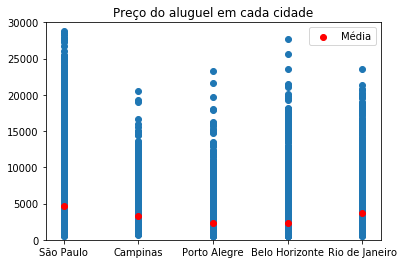


Preço médio em cada cidade

São Paulo:       4652 R$
Rio de Janeiro:  3232 R$
Porto Alegre:    2337 R$
Campinas:        2364 R$
Belo Horizonte:  3664 R$



In [441]:
def med(dados):
    x, sp , s, rio, r, pa, p, cam, c, bh, b = 0,0,0,0,0,0,0,0,0,0,0

    for i in dados.iloc[:,0]:
        if i=="São Paulo":    
            sp=sp+dados.iloc[x,9]
            s=s+1
        if i=="Rio de Janeiro":
            rio=rio+dados.iloc[x,9]
            r=r+1
        if i=="Porto Alegre":
            pa=pa+dados.iloc[x,9]
            p=p+1
        if i=="Campinas":
            cam=cam+dados.iloc[x,9]
            c=c+1
        if i=="Belo Horizonte":
            bh=bh+dados.iloc[x,9]
            b=b+1
        x=x+1

    spm = sp/s
    riom = rio/r
    pam = pa/p
    camm = cam/c
    bhm = bh/b

    print()
    plt.scatter(dados.iloc[:,0],dados.iloc[:,12])
    plt.ylim(0,30000)
    plt.scatter(0,spm,color='red', label="Média")
    plt.scatter(1,riom,color='red')
    plt.scatter(2,pam,color='red')
    plt.scatter(3,camm,color='red')
    plt.scatter(4,bhm,color='red')
    plt.legend()
    plt.title("Preço do aluguel em cada cidade")
    plt.show()
    print()
    print("Preço médio em cada cidade")
    print()
    print("São Paulo:       {0} R$".format(int(spm)))
    print("Rio de Janeiro:  {0} R$".format(int(riom)))
    print("Porto Alegre:    {0} R$".format(int(pam)))
    print("Campinas:        {0} R$".format(int(camm)))
    print("Belo Horizonte:  {0} R$".format(int(bhm)))
    print()
    
med(dados)

* São Paulo é a cidade com a média de aluguel mais caro
* Porto Alegre e campinas são as cidades com a média de aluguel mais barato

___

Qual a relação entre esses dados? Podemos criar um gráfico "3d" para ver a relação entre esses dados utilizando cores como nosso eixo de relação. Assim 1 (Branco) representa alta relação e 0 (Preto) representa baixa ou nenhuma relação.

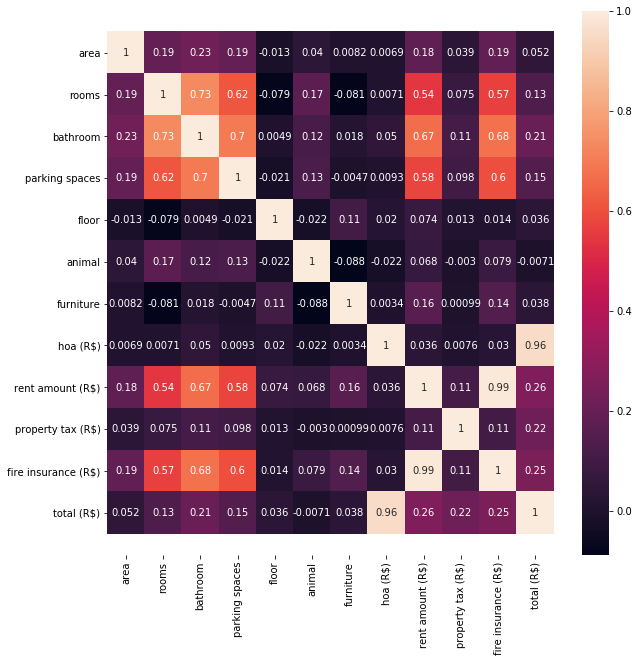

In [442]:
plt.figure(figsize =(10,10))
cor = dados[dados.columns].corr()
sns.heatmap(cor,annot =True).set_ylim(12.5, -0.5)
plt.show()

___
Algumas relações fazem muito sentido e servem para confirmar os dados, como a relação de banheiros por quartos ser alta, já outras podem não fazer sentido, como por exemplo o valor do seguro contra fogo e a quantidade de banheiros na casa.

Eliminando a coluna de andar da propriedade ("floor"), animais de estimação e mobília (“Furniture”) por terem baixa correlação com outras características criamos um gráfico de gráficos em “scatter” da relação de cada um com a função "pairplot".

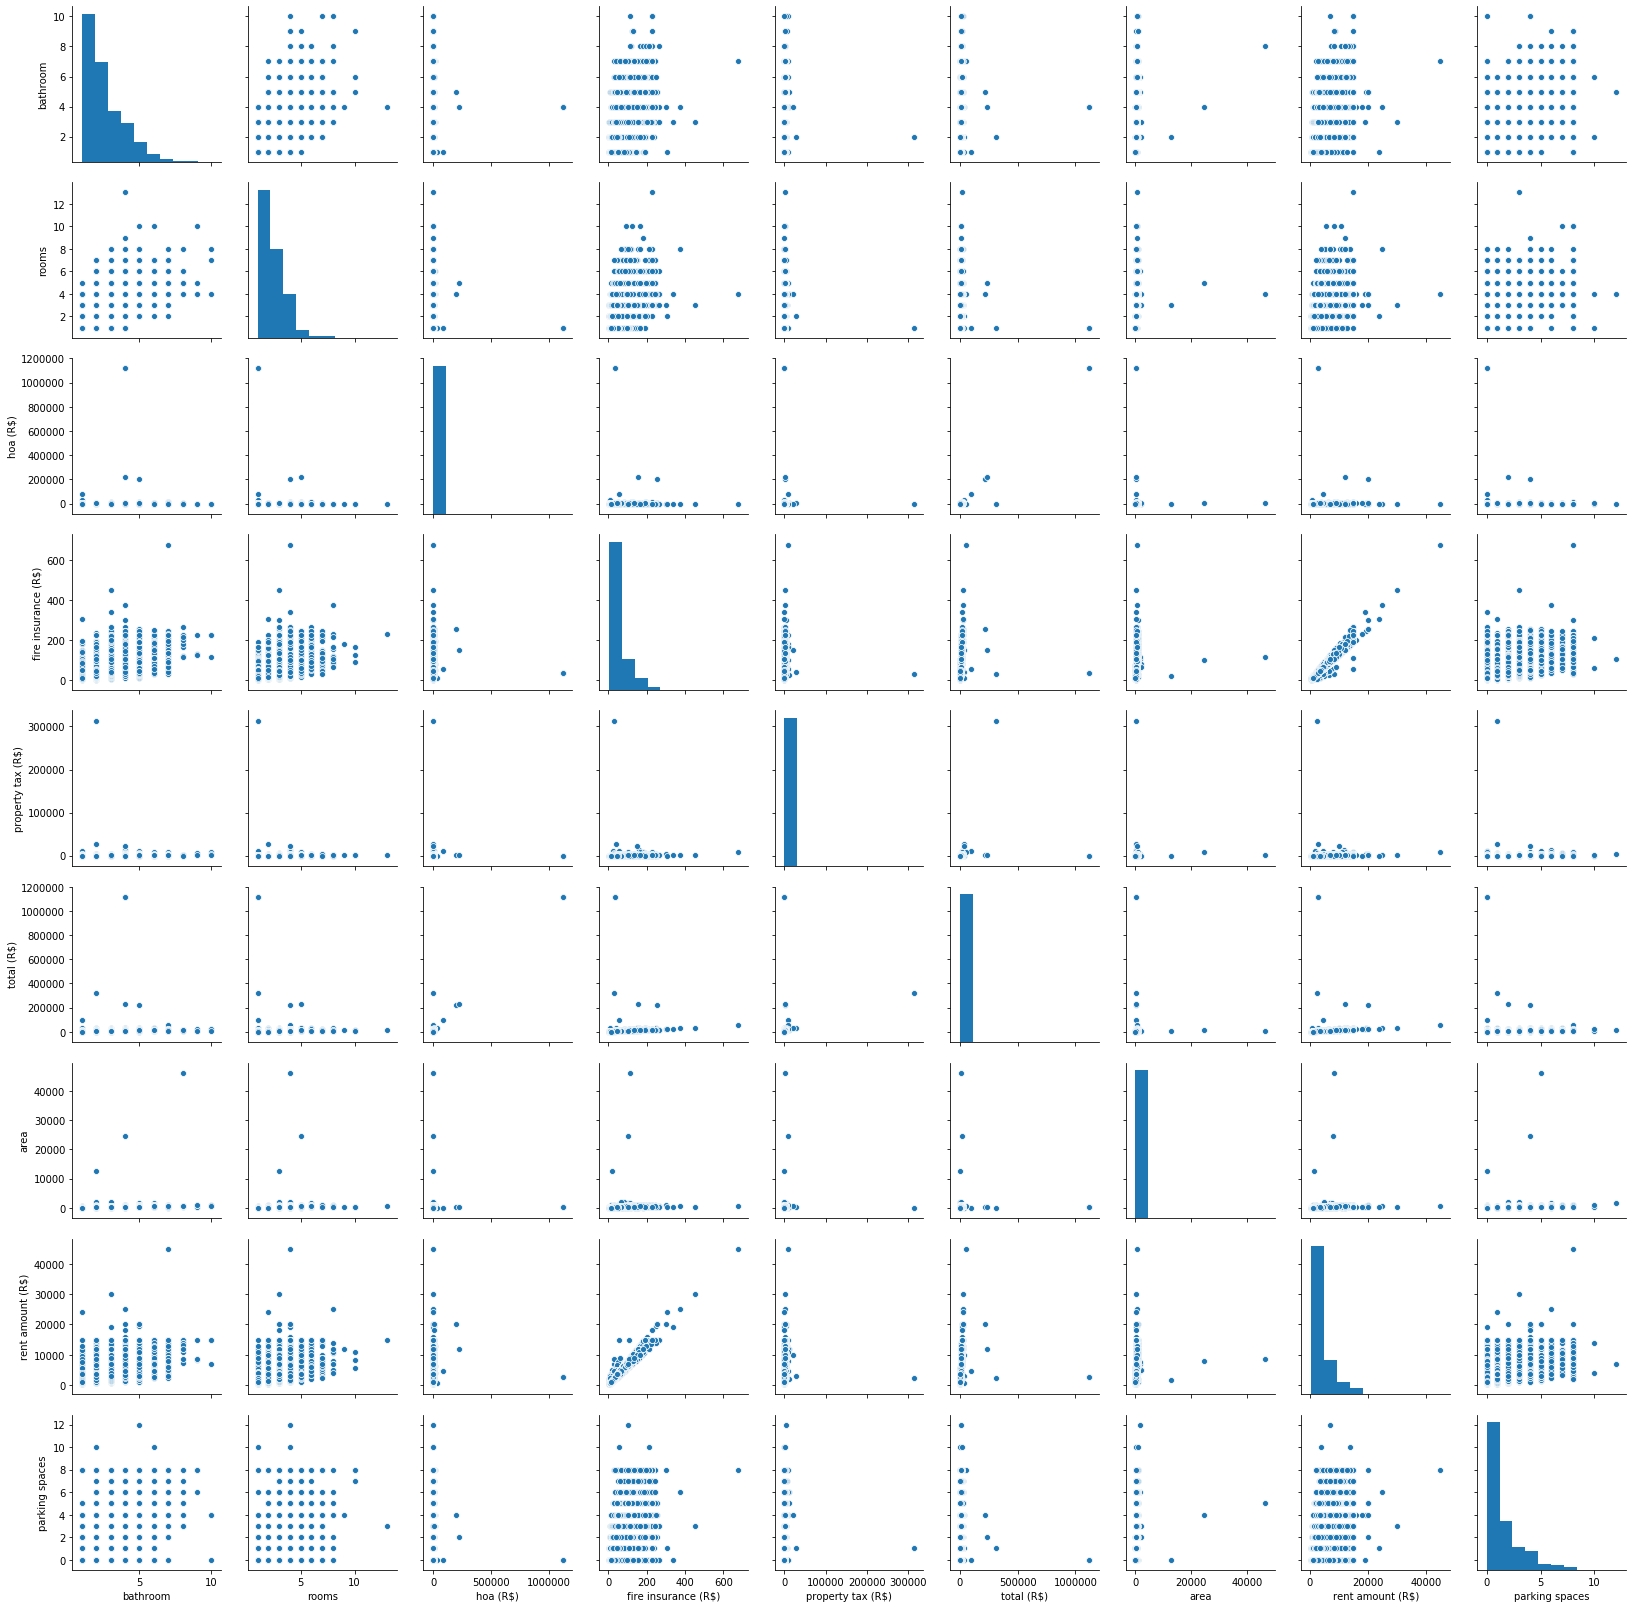

In [443]:
relac = ['bathroom', 'rooms', 'hoa (R$)', 'fire insurance (R$)', 'property tax (R$)', 'total (R$)', 'area', 'rent amount (R$)', 'parking spaces']
sns.pairplot(dados[relac])

___
Com base nesses dados escolhemos 4 características para prever o preço do aluguel: Quantidade de quartos, quantidade de vagas de estacionamento, quantidade de banheiros e o valor do seguro de incêndio.

Podemos comparar essas características por cidade no dataset:

Text(0.5, 1.0, 'Quantidade de quartos por cidade')

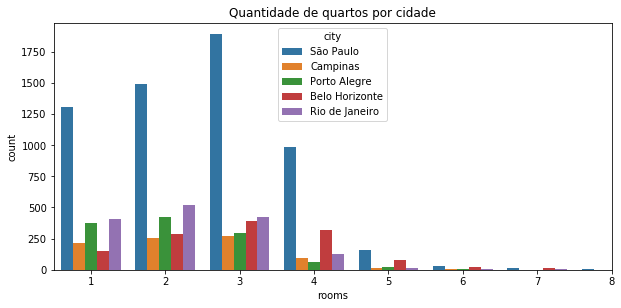

In [444]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
sns.countplot(dados[dados.columns[2]],hue = dados['city'])
plt.xlim(right=7)
plt.title("Quantidade de quartos por cidade")

Text(0.5, 1.0, 'Quantidade de banheiros por cidade')

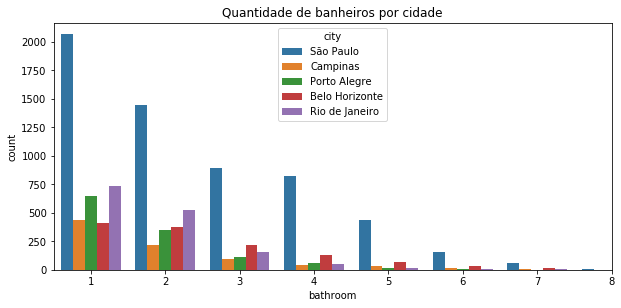

In [445]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
sns.countplot(dados[dados.columns[3]],hue = dados['city'])
plt.xlim(right=7)
plt.title("Quantidade de banheiros por cidade")

Text(0.5, 1.0, 'Vagas de estacionamento por cidade')

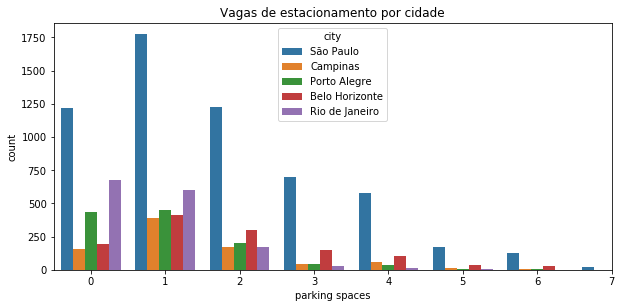

In [446]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
sns.countplot(dados[dados.columns[4]],hue = dados['city'])
plt.xlim(right=7)
plt.title("Vagas de estacionamento por cidade")

___

### Separando a base de dados entre treinamento e teste

Devemos separar os dados de treinamento e de teste para certificar que o modelo não é qualificado apenas para avaliar os dados usados para treino, mas que esta qualificado para prever dados novos com precisão.

In [447]:
df_treinamento = dados.iloc[0:8000]
df_teste = dados.iloc[8000:]


8000 dados para treinamento

2692 dados para teste

<div id="3"></div>

___

# Modelos de Predição

___

## Regressão linear


   Em estatística, a regressão linear é uma abordagem linear para modelar o relacionamento entre uma resposta escalar e uma ou mais variáveis explicativas. Para mais de uma variável explicativa, o processo é chamado de regressão linear múltipla. Na regressão linear, os relacionamentos são modelados usando funções preditivas lineares cujos parâmetros desconhecidos do modelo são estimados a partir dos dados. Tais modelos são chamados de modelos lineares. Assume-se que a média condicional da resposta, dados os valores das variáveis explicativas, seja uma função afim desses valores. Como todas as formas de análise de regressão, a regressão linear se concentra na distribuição de probabilidade condicional da resposta, dados os valores dos preditores, e não na distribuição de probabilidade conjunta de todas essas variáveis, que é o domínio da análise multivariada.
___
Vamos usar como exemplo a quantidade de vagas de estacionamento e o valor do aluguel onde que os pontos representam os valores reais e a linha representa o modelo linear.

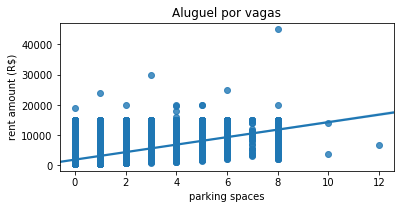

In [448]:
plt.figure(figsize =(6,6))
plt.subplot(2,1,1)
ax = sns.regplot(dados['parking spaces'],dados['rent amount (R$)'])
plt.title("Aluguel por vagas")
plt.show()

Esse modelo demonstra uma regressão linear simples porque estamos usando apenas a variavel de vagas de estacionamento, podemos utilizar o "statsmodels.api" para criarmos um modelo de múltiplas variáveis em [Processo e Estatísticas de Validação - Regressão linear](#5)
___

<div id="5"></div>

## Árvores de regressão
___

A árvore de regressão constrói modelos de regressão ou classificação na forma de uma estrutura em árvore. Ela divide um conjunto de dados em subconjuntos cada vez menores e, ao mesmo tempo, uma árvore de decisão associada é desenvolvida de forma incremental. O resultado final é uma árvore com nós de decisão.

Ela permite utilizar valores qualitativos não-binários como as cidades para prever o preço do aluguel.

Usaremos ela em [Processo e Estatísticas de Validação - Árvores de regressão](#8)

<div id="6"></div>

___

## Processo e Estatísticas de Validação
___

### Regressão linear

Para criarmos um modelo de múltiplas variáveis devemos separar o eixo y do valor do aluguel e o eixo x que representa as 4 características encontradas de cada propriedade:

In [449]:
Y_treinamento = df_treinamento[dados.columns[9]].astype(float)
X_treinamento = df_treinamento[dados.columns[[2,3,4,11]]].astype(float)

Y_teste = df_teste[dados.columns[9]].astype(float)
X_teste = df_teste[dados.columns[[2,3,4,11]]].astype(float)

Criamos e treinamos a função de regressão linear com a base de treinamento. Obtendo assim um sumario da regressão linear. 

In [450]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

modelo = regress(X_treinamento,Y_treinamento)
modelo.summary()

C:\Users\nevton\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rent amount (R$)   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 7.899e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:13:59   Log-Likelihood:                -61568.
No. Observations:                8000   AIC:                         1.231e+05
Df Residuals:                    7995   BIC:                         1.232e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 231.0451     14.377     16.070      0.000     202.862     259.228
rooms                 -97.1393      7.717    -12.587      0.000    -112.267     -82.011
bathroom               82.5335      7.525     10.968      0.000      67.783      97.284
parking spaces        -41.0767      5.545     -7.408      0.000     -51.946     -30.208
fire insurance (R$)    71.1745      0.175    405.617      0.000      70.831      71.518
==============================================================================
Omnibus:                     3581.633   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           402484.788
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                      37.670   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___
O modelo tem alta confiança como é possível verificar com o "R-squared" de ~0.97

Mas como ficaria a previsão em comparação com os valores reais?

Criamos um grafico entre os valores reais e os valores previstos:

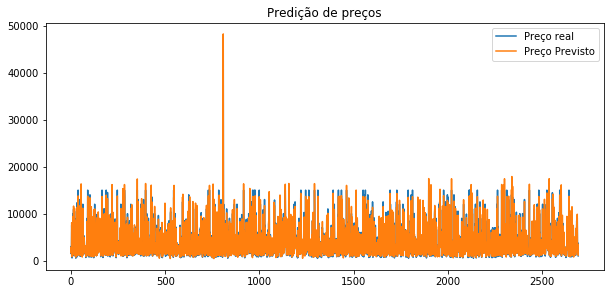

In [451]:
Y_pre = modelo.predict(sm.add_constant(X_teste))

t = list(range(0, len(Y_pre)))

plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.title("Predição de preços")
plt.plot(t,Y_teste, label='Preço real')
plt.plot(t,Y_pre, label = 'Preço Previsto')
plt.legend()
plt.show()

___
Caso o valor do seguro de incêndio não esteja disponível é possível fazer um modelo apenas com a quantidade de quartos, vagas e banheiros:

In [452]:
X_treinamento2 = df_treinamento[dados.columns[[2,3,4]]].astype(float)

modelo = regress(X_treinamento2,Y_treinamento)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rent amount (R$)   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     2339.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:13:59   Log-Likelihood:                -73854.
No. Observations:                8000   AIC:                         1.477e+05
Df Residuals:                    7996   BIC:                         1.477e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             99.5247     66.765      1.491      0.136     -31.352     230.402
rooms            210.9015     35.673      5.912      0.000     140.974     280.829
bathroom        1143.0870     32.775     34.876      0.000    1078.839    1207.335
parking spaces   423.8167     25.199     16.819      0.000     374.421     473.213
==============================================================================
Omnibus:                     2680.610   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13017.307
Skew:                           1.550   Prob(JB):                         0.00
Kurtosis:                       8.426   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

____
O valor de "R-squared" é baixo, de ~0.47

<div id="8"></div>

___

## Árvores de regressão


Vamos separar os eixos x e y como feito previamente, porem dessa vez utilizaremos um "score" para verificar nossa previsão.

In [454]:
Y_treinamento = df_treinamento[dados.columns[9]].astype(float)
X_treinamento1 = df_treinamento[dados.columns[[2,3,4,11]]].astype(float)
X_treinamento2 = df_treinamento[dados.columns[[1,2,3,4,11]]].astype(float)

Y_teste = df_teste[dados.columns[9]].astype(float)
X_teste1 = df_teste[dados.columns[[2,3,4,11]]].astype(float)
X_teste2 = df_teste[dados.columns[[1,2,3,4,11]]].astype(float)

Arvore = DecisionTreeRegressor(random_state = 1)
modelo1 = Arvore.fit(X_treinamento1, Y_treinamento)
Y_pred1 = modelo1.predict(X_teste1)
re1 = float(modelo1.score(X_teste1,Y_teste)*100)

modelo2 = Arvore.fit(X_treinamento2, Y_treinamento)
Y_pred2 = modelo2.predict(X_teste2)
re2 = float(modelo2.score(X_teste2,Y_teste)*100)

print("Pontuação do classificador com e sem cidades:")
print()
print("Sem utilizar cidades: {0}%".format(re1))
print()
print("Utilizando cidades:   {0}%".format(re2))
print()

Pontuação do classificador com e sem cidades:

Sem utilizar cidades: 97.21238044032454%

Utilizando cidades:   96.79295906967312%



<div id="9"></div>

___

## Conclusão

___

<div value="f"></div>

É possível afirmar que o classificador de regressão linear é capaz de prever o preço do aluguel com grande confiança baseando-se no preço do seguro de incêndio, número de quartos, banheiros e vagas de estacionamento. Porém o modelo se torna muito dependente do preço do seguro de incêndio, assim é valido levantar que o valor de seguro de incêndio esteja ligado ao valor de compra da propriedade e este esteja ligado ao valor de aluguel. 

Para a árvore de regressão que permite levar em consideração a cidade em que cada imóvel se encontra, a inclusão da variável resultou em um pequeno aumento na pontuação do classificador, de ~0.3%. Uma possível justificativa é que o valor do aluguel varia mais entre diferentes regiões de cada cidade do que de uma cidade para a outra. 

    obs: ~~~ Os valores em "~" podem ser alterados por conta da randomização do dataset feita no inicio.

<div id="link"></div>

___
## Referências Bibliográficas
___

https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent